<a href="https://colab.research.google.com/github/myasmin/Capstone-3-TripAdvisor_Review_NLP-/blob/main/Topic_Analysis_on_TripAdvisor_Restaurant_Reviews_for_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clear memory :

In [1]:
%reset -f

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Import All Libraries:

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pprint import pprint

###Import Dataset:

In [4]:
barcelona = pd.read_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/data/Barcelona_reviews.csv')
barcelona.head()

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,0,1,Chalito_Rambla,1,Negative,review_774086112,Terrible food Terrible service,"Ok, this place is terrible! Came here bc we’ve...","Ok, this place is terrible! Came here bc we’ve...","October 12, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,1,2,Chalito_Rambla,5,Positive,review_739142140,The best milanesa in central Barcelona,This place was a great surprise. The food is d...,This place was a great surprise. The food is d...,"January 14, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,2,3,Chalito_Rambla,5,Positive,review_749758638,Family bonding,The food is excellent.....the ambiance is very...,The food is excellent.....the ambiance is very...,"March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,3,4,Chalito_Rambla,5,Positive,review_749732001,Best food,"The food is execellent ,affortable price for p...","The food is execellent ,affortable price for p...","March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,4,5,Chalito_Rambla,5,Positive,review_749691057,Amazing Food and Fantastic Service,"Mr Suarez,The food at your restaurant was abso...","Mr Suarez,The food at your restaurant was abso...","March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


###Modify Data for Text Analysis (Data Preprocessing):

In [5]:
## Delete Unnecessary Columns:
barcelona.drop(columns=["Unnamed: 0","parse_count","review_id","url_restaurant","author_id","date","title_review","review_preview","city"],inplace=True)

In [6]:
## Delete all Null rows:
barcelona= barcelona.dropna(how='any',axis=0)

In [7]:
## Change Variable(Column Type):
barcelona['rating_review'] = barcelona['rating_review'].astype('float')
barcelona['rating_review'] = barcelona['rating_review'].astype('int64')

In [8]:
barcelona.head()

,restaurant_name,rating_review,sample,review_full
0,Chalito_Rambla,1,Negative,"Ok, this place is terrible! Came here bc we’ve..."
1,Chalito_Rambla,5,Positive,This place was a great surprise. The food is d...
2,Chalito_Rambla,5,Positive,The food is excellent.....the ambiance is very...
3,Chalito_Rambla,5,Positive,"The food is execellent ,affortable price for p..."
4,Chalito_Rambla,5,Positive,"Mr Suarez,The food at your restaurant was abso..."


In [104]:
barcelona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416354 entries, 0 to 416355
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   restaurant_name  416354 non-null  object
 1   rating_review    416354 non-null  int64 
 2   sample           416354 non-null  object
 3   review_full      416354 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.9+ MB


### Exploratory Data Analysis on Dataset:

####Analysis on 'Sample'( review Positive or Negative) Variable:


Text(0, 0.5, 'Total Count on Reviews')

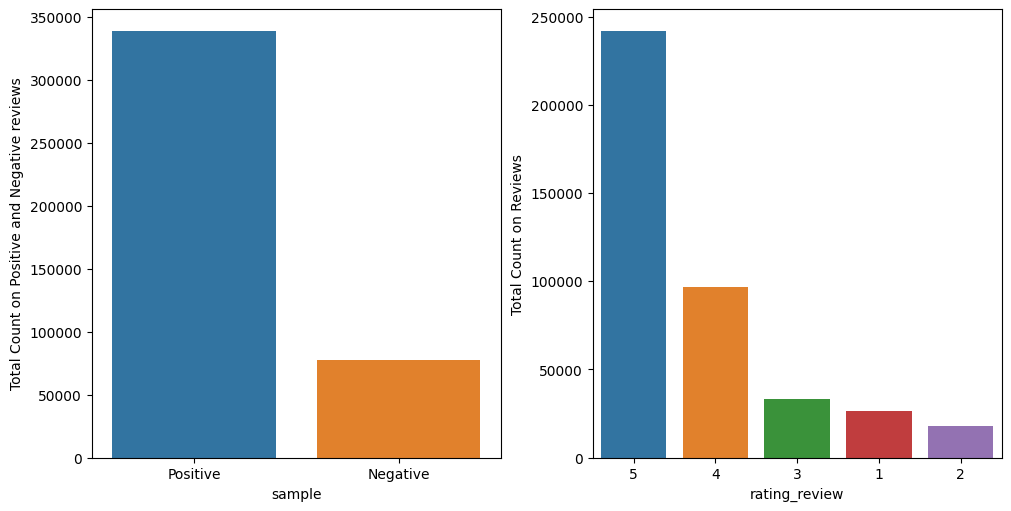

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5),layout="constrained")

#Create a Barplot:
sns.countplot( x= 'sample', data= barcelona, order=barcelona['sample'].value_counts().index, ax=ax1)
ax1.set_ylabel("Total Count on Positive and Negative reviews")

sns.countplot( x= 'rating_review', data= barcelona, order=barcelona['rating_review'].value_counts().index, ax=ax2)
ax2.set_ylabel("Total Count on Reviews")

Comment:

#### Analysis on 'Restaurant Name' Variable:

In [17]:
barcelona['restaurant_name'].nunique()

6621

Comment:

#### Analysis on Restaurant Reviews:

Import Libraries

For primary preprocessing purpose, we will use the NLTK library:

In [9]:
import nltk

nltk.download(['stopwords','averaged_perceptron_tagger','wordnet'])

from collections import defaultdict
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Set Stopwords:

In [10]:
stop = set(stopwords.words('english'))

POS Tagging:

In [11]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Preprocessing:

In [12]:
def preprocess(doc, stop_words= stop):
    regex_token = RegexpTokenizer(r'\w+')
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer()
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [13]:
barcelona['text'] = barcelona['review_full'].map(lambda s: preprocess(s))

Tokenizing:

In [14]:
barcelona['tokenized'] = [x.split() for x in barcelona['text']]

In [15]:
barcelona.head()

,restaurant_name,rating_review,sample,review_full,text,tokenized
0,Chalito_Rambla,1,Negative,"Ok, this place is terrible! Came here bc we’ve...",ok place terrible come bc always walk around s...,"[ok, place, terrible, come, bc, always, walk, ..."
1,Chalito_Rambla,5,Positive,This place was a great surprise. The food is d...,place great surprise food delicious dessert we...,"[place, great, surprise, food, delicious, dess..."
2,Chalito_Rambla,5,Positive,The food is excellent.....the ambiance is very...,food excellent ambiance nice price affordable ...,"[food, excellent, ambiance, nice, price, affor..."
3,Chalito_Rambla,5,Positive,"The food is execellent ,affortable price for p...",food execellent affortable price people friend...,"[food, execellent, affortable, price, people, ..."
4,Chalito_Rambla,5,Positive,"Mr Suarez,The food at your restaurant was abso...",mr suarez food restaurant absolutely amazing h...,"[mr, suarez, food, restaurant, absolutely, ama..."


Save the Preprocessed Tokenized Dataset for further use:

In [25]:
#barcelona = pd.read_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/data/barcelona.csv', index_col=False)

Frequency Distrubution of Top Tokenized Words:

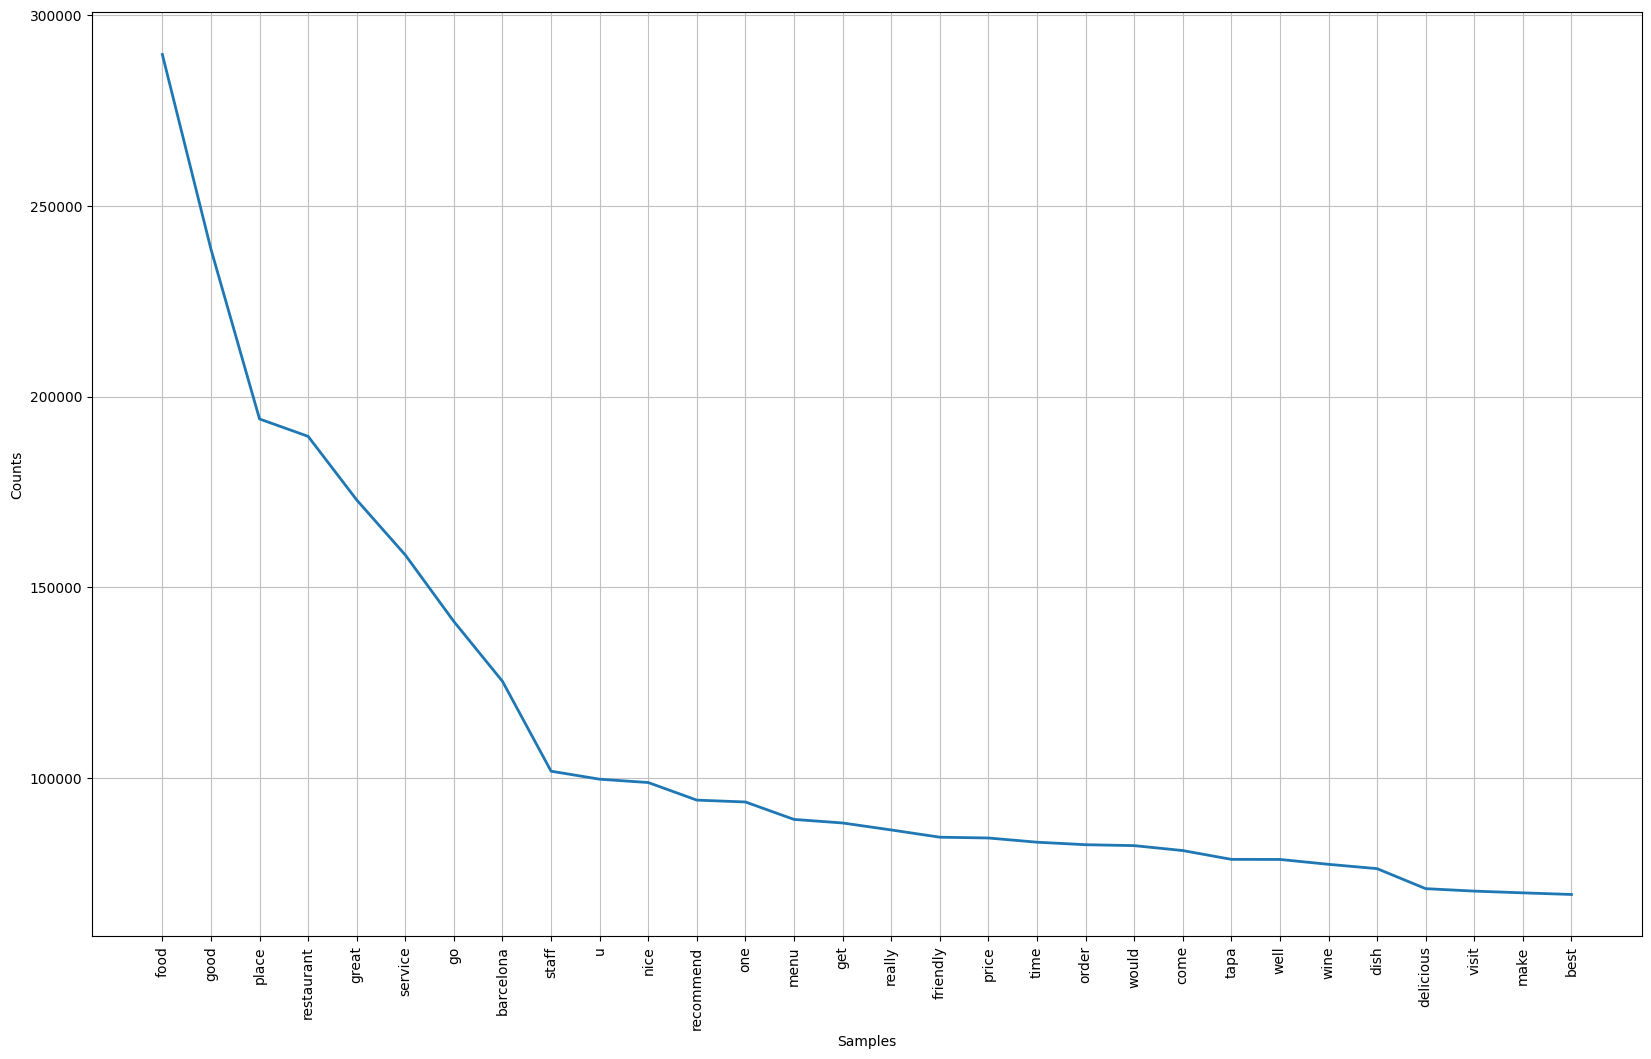

<Axes: xlabel='Samples', ylabel='Counts'>

In [16]:
tokenized_words = barcelona['tokenized'].to_list()

word_list = []
for x in tokenized_words:
    word_list.extend(x)
word_list
freq_dist_text = nltk.FreqDist(word_list)
plt.subplots(figsize=(20,12))
freq_dist_text.plot(30)

Top 20 most Common words:

In [17]:
freq_dist_text.most_common(20)

[('food', 289763),
 ('good', 238723),
 ('place', 194183),
 ('restaurant', 189630),
 ('great', 172956),
 ('service', 158522),
 ('go', 141073),
 ('barcelona', 125397),
 ('staff', 101827),
 ('u', 99726),
 ('nice', 98855),
 ('recommend', 94242),
 ('one', 93757),
 ('menu', 89182),
 ('get', 88252),
 ('really', 86422),
 ('friendly', 84520),
 ('price', 84313),
 ('time', 83208),
 ('order', 82553)]

Wordclouds w.r.to Positive and Negative reviews:

In [18]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

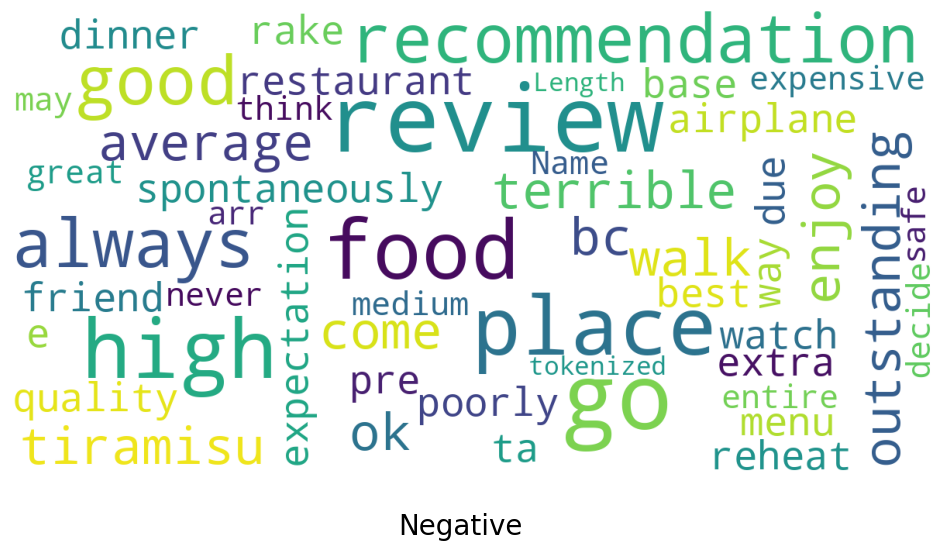

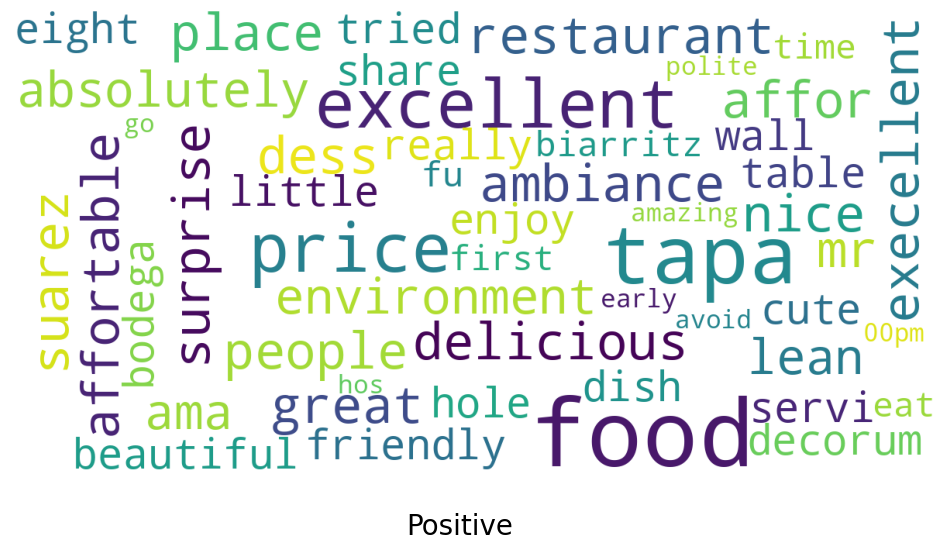

In [19]:
for rating in list(barcelona['sample'].unique()):
    show_wordcloud(barcelona[barcelona['sample']==rating]['tokenized'], title=rating)

Wordcount by reviews:

In [30]:
barcelona['Word_count']= barcelona['review_full'].map(lambda x: len(x.split()))

<Axes: xlabel='rating_review', ylabel='Word_count'>

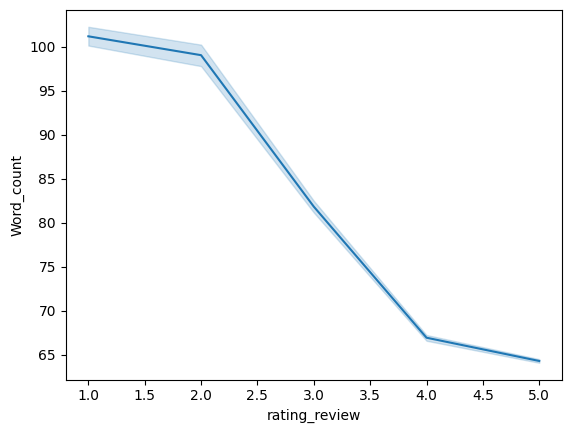

In [31]:
sns.lineplot(x='rating_review', data=barcelona, y='Word_count')

Observation:

Reviewers with 5 star ratings tend to use less words in their reveiws/ comments, where as people with 1 and 2 star rating tend to use more words to post their reviews.


So, in general we can infer that most people are happy with the service and they post positive reviews. People who are not happy with the services, they post long reviews; but they are less in numbers compared to the number of happy customers.



---



---



#####**Text Analysis on Restaurants Reviews:**

From this point forward, we will work on Topic Modelling from the reviews on the restaurants. Genism and Spacy has a powerful features to model the data and infer the information.

We will follow the LDA approach to model the possible topics.

Due to logistic constraints, we will free the occupied memory to run our analysis time by time.

Clear Memory to start fresh:

In [32]:
%reset -f

In [33]:
import gc
gc.collect()

0

Import Libraries:

In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Recall the clean, tokenized dataframe:

In [35]:
barcelona = pd.read_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/data/barcelona.csv', index_col=False)

In [36]:
barcelona.head()

,restaurant_name,rating_review,sample,review_full,text,tokenized
0,Chalito_Rambla,1,Negative,"Ok, this place is terrible! Came here bc we’ve...",ok place terrible come bc always walk around s...,"['ok', 'place', 'terrible', 'come', 'bc', 'alw..."
1,Chalito_Rambla,5,Positive,This place was a great surprise. The food is d...,place great surprise food delicious dessert we...,"['place', 'great', 'surprise', 'food', 'delici..."
2,Chalito_Rambla,5,Positive,The food is excellent.....the ambiance is very...,food excellent ambiance nice price affordable ...,"['food', 'excellent', 'ambiance', 'nice', 'pri..."
3,Chalito_Rambla,5,Positive,"The food is execellent ,affortable price for p...",food execellent affortable price people friend...,"['food', 'execellent', 'affortable', 'price', ..."
4,Chalito_Rambla,5,Positive,"Mr Suarez,The food at your restaurant was abso...",mr suarez food restaurant absolutely amazing h...,"['mr', 'suarez', 'food', 'restaurant', 'absolu..."


In this part, we will emphesize on using Spacy and Genism Libraries to preprocess for modelling.

In [37]:
! pip install spacy

In [38]:
! python -m spacy download en_core_web_sm

2023-11-02 15:22:23.912149: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 15:22:23.912297: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 15:22:23.912391: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 15:22:23.940047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 15:22:26.919574: W tensorflow/compiler/

In [39]:
# Import NLTK
import nltk
nltk.download('stopwords')

# Import Spacy
import spacy

# Import Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will use NLTK stopwords corpus, modifying it to minimize the bias for further analysis.

In [40]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['food', 'place', 'restaurant', 'go'])

In [41]:
pprint(barcelona['text'])

0         ok place terrible come bc always walk around s...
1         place great surprise food delicious dessert we...
2         food excellent ambiance nice price affordable ...
3         food execellent affortable price people friend...
4         mr suarez food restaurant absolutely amazing h...
                                ...                        
416349    cute little hole wall decorum beautiful food q...
416350    really enjoy tapa eight tapa dish share delici...
416351    tried get table bodega biarritz 1820 full 6 15...
416352    first time eat tapas amazing polite hospitable...
416353    go early 6 00pm avoid queue group 7 restaurant...
Name: text, Length: 416354, dtype: object


Due to logistic constraint, we will consider a sample of 20000 rows from the 'barcelona' dataframe to fit our model. We will take equal number of samples from both positive and negative reviews to keep control on bias/ avoid overfitting of the model.

In [42]:
sample_df = barcelona.groupby('sample').sample(n=10000, random_state=12)
df = sample_df['text']

df.head()

396553    bit overrated place busy food good ate place well
94848     interesting place eat strange juxtaposition tr...
354828    second day barcelona sat friend late afternoon...
55258     found place tripadvisor surf great paella loca...
264608    look personalize service place felt owner wait...
Name: text, dtype: object

Lets start processing our text to get it ready to fit our model:

Tokenize words and Clean-up text

In [44]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df))

print(data_words[:1])

[['bit', 'overrated', 'place', 'busy', 'food', 'good', 'ate', 'place', 'well']]


Creating Bigram and Trigram Models

In [83]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)  # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)                   # we will be avoiding working out with Trigrams because the google colab runs out of ram.

# See trigram example
print(bigram_mod[data_words[0]])

['bit', 'overrated', 'place', 'busy', 'food', 'good', 'ate', 'place', 'well']


Remove Stopwords, Make Bigrams and Lemmatize

In [46]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm",disable=['parser', 'ner'])

In [47]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
#   return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [48]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['bit', 'overrate', 'busy', 'good', 'eat', 'well']]


Create the Dictionary and Corpus needed for Topic Modeling

In [49]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Filter out words that occur less than 10 by numbers in the documents, or more than 90% of the documents.
id2word.filter_extremes(no_below=10, no_above=0.9)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [50]:
id2word[0]

'bit'

In [51]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('bit', 1),
  ('busy', 1),
  ('eat', 1),
  ('good', 1),
  ('overrate', 1),
  ('well', 1)]]

#####**Building the Topic Model:**

Optimal Number of Topics Based on Coherence Score: (Using UMass Measure)

In [52]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [53]:
start = 2
limit = 20
step = 2

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

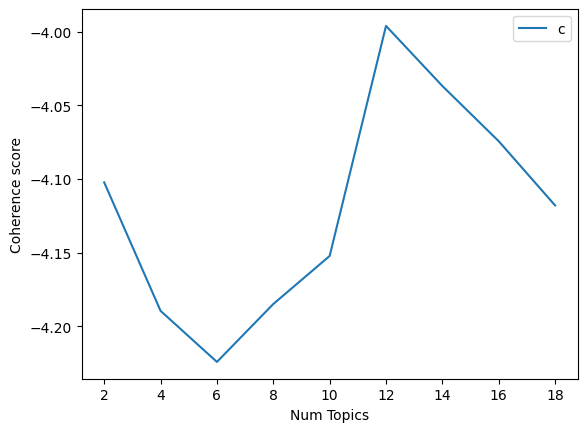

In [54]:
# Show graph
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [55]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -4.1023
Num Topics = 4  has Coherence Value of -4.1894
Num Topics = 6  has Coherence Value of -4.2241
Num Topics = 8  has Coherence Value of -4.1848
Num Topics = 10  has Coherence Value of -4.1522
Num Topics = 12  has Coherence Value of -3.9961
Num Topics = 14  has Coherence Value of -4.0369
Num Topics = 16  has Coherence Value of -4.0743
Num Topics = 18  has Coherence Value of -4.1179


We will consider 6 topics to build the topic model.

Building the LDA Model:

In [56]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6,
                                           random_state=34,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

View the topics in LDA model

In [57]:
# Print the Keyword in the 11 topics
pprint(lda_model.print_topics())

[(0,
  '0.039*"time" + 0.036*"get" + 0.033*"come" + 0.028*"table" + 0.027*"back" + '
  '0.024*"drink" + 0.024*"bar" + 0.022*"even" + 0.020*"wait" + 0.018*"waiter"'),
 (1,
  '0.086*"meal" + 0.047*"order" + 0.036*"course" + 0.034*"pizza" + '
  '0.032*"dessert" + 0.030*"main" + 0.028*"salad" + 0.022*"burger" + '
  '0.022*"share" + 0.021*"plate"'),
 (2,
  '0.126*"wine" + 0.028*"bread" + 0.025*"fun" + 0.025*"glass" + 0.024*"din" + '
  '0.024*"bottle" + 0.022*"include" + 0.019*"present" + 0.018*"year" + '
  '0.017*"italian"'),
 (3,
  '0.063*"make" + 0.036*"night" + 0.034*"dinner" + 0.024*"feel" + '
  '0.024*"perfect" + 0.023*"wonderful" + 0.019*"book" + 0.018*"always" + '
  '0.018*"area" + 0.018*"return"'),
 (4,
  '0.045*"cook" + 0.041*"meat" + 0.037*"steak" + 0.033*"cheese" + 0.032*"fish" '
  '+ 0.026*"sauce" + 0.019*"grill" + 0.019*"perfectly" + 0.017*"chicken" + '
  '0.015*"gem"'),
 (5,
  '0.054*"good" + 0.036*"great" + 0.028*"service" + 0.020*"barcelona" + '
  '0.020*"recommend" + 0.020*

Compute Model Perplexity and Coherence Score

In [58]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score considering U_Mass: ', coherence_lda)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score considering CV: ', coherence_lda)


Perplexity:  -6.841910000956514

Coherence Score considering U_Mass:  -2.6949385998594875

Coherence Score considering CV:  0.49936152128017103


#####**EDA on the Topics from the Model:**

We will try to dig down deep to get an idea on the relevancy of the Topics. For that, we will implement some visualization and try to analyze the  the keywords for each topics. The module followed for visualizetion can be found [here](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#15visualizethetopicskeywords) and [here](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#12.-What-are-the-most-discussed-topics-in-the-documents?).

What is the Dominant topic and its percentage contribution in each document/row:

In [59]:
def format_topics_sentences(ldamodel= None, corpus=corpus, texts= texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts= texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5,0.5518,"good, great, service, barcelona, recommend, st...","[bit, overrate, busy, good, eat, well]"
1,1,5,0.5619,"good, great, service, barcelona, recommend, st...","[interesting, eat, strange, juxtaposition, tri..."
2,2,0,0.5226,"time, get, come, table, back, drink, bar, even...","[second, day, barcelona, sit, friend, late, af..."
3,3,5,0.6514,"good, great, service, barcelona, recommend, st...","[find, tripadvisor, surf, great, location, nic..."
4,4,5,0.4210,"good, great, service, barcelona, recommend, st...","[look, personalize, service, feel, owner, wait..."
5,5,5,0.5477,"good, great, service, barcelona, recommend, st...","[find, walk, full, local, try, disapoitment, g..."
6,6,5,0.5428,"good, great, service, barcelona, recommend, st...","[terrible, definitely, avoid, order, paella, s..."
7,7,0,0.3722,"time, get, come, table, back, drink, bar, even...","[wait, seat, minute, drink, order, take, order..."
8,8,5,0.4477,"good, great, service, barcelona, recommend, st...","[take, forever, get, tapa, bring, separately, ..."
9,9,5,0.4531,"good, great, service, barcelona, recommend, st...","[recommend, guy, visit, sit, average, way, exp..."


The most representative sentence for each topic:

In [60]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.6235,"time, get, come, table, back, drink, bar, even, wait, waiter","[wait, age, order, get, mixed, meet, untrained, staff, look, invite, quirky, garden, nice, decor..."
1,5,0.6967,"good, great, service, barcelona, recommend, staff, friendly, nice, eat, price","[find, true, delicious, hamburger, city, difficult, find, even, evident, barcelona, let, start, ..."


Word Clouds of Top N Keywords for Each Topic:

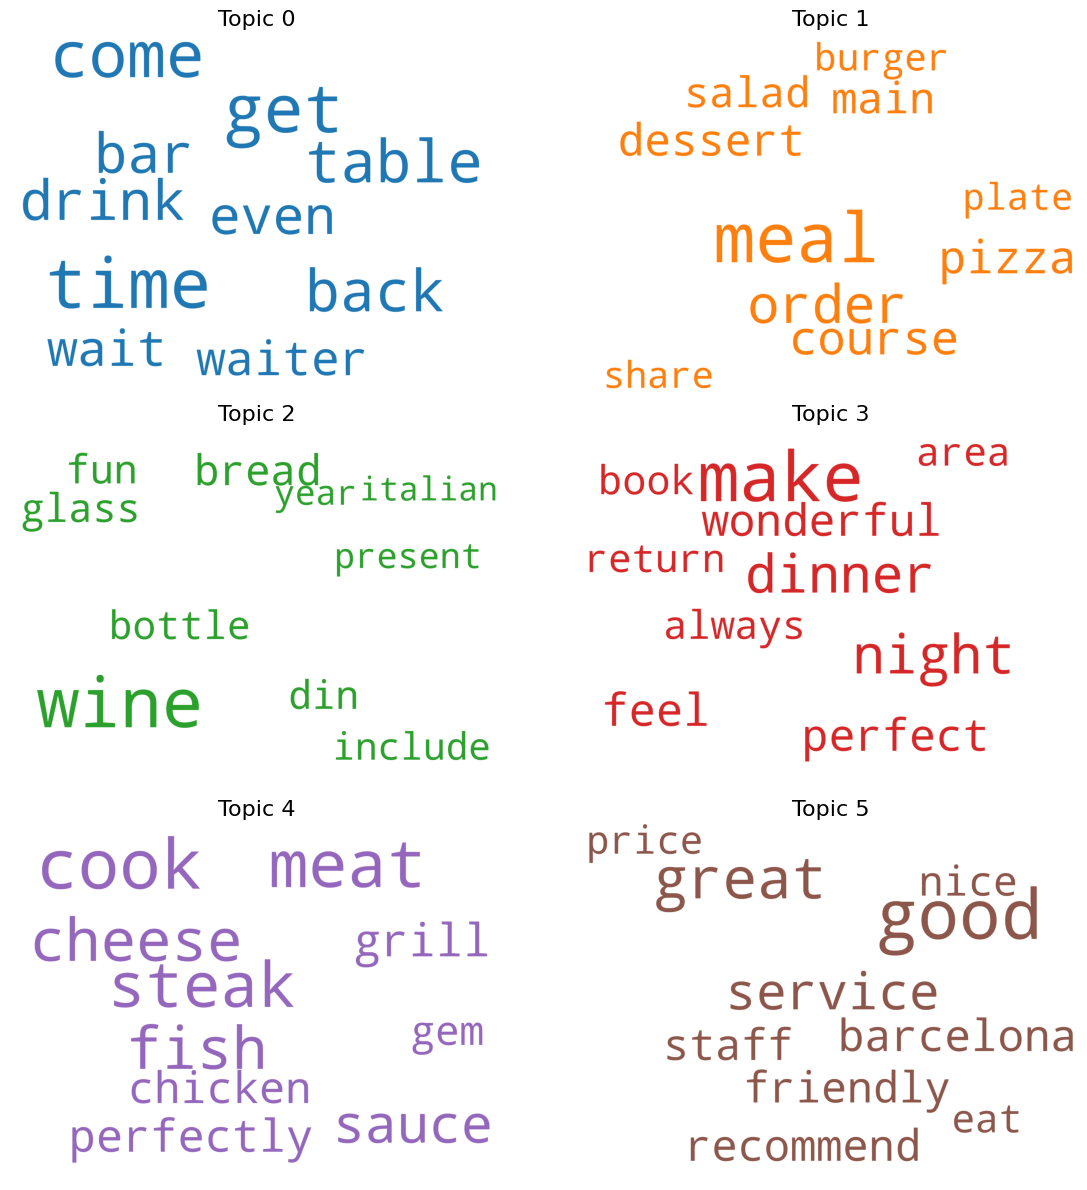

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=350)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Word Counts of Topic Keywords:

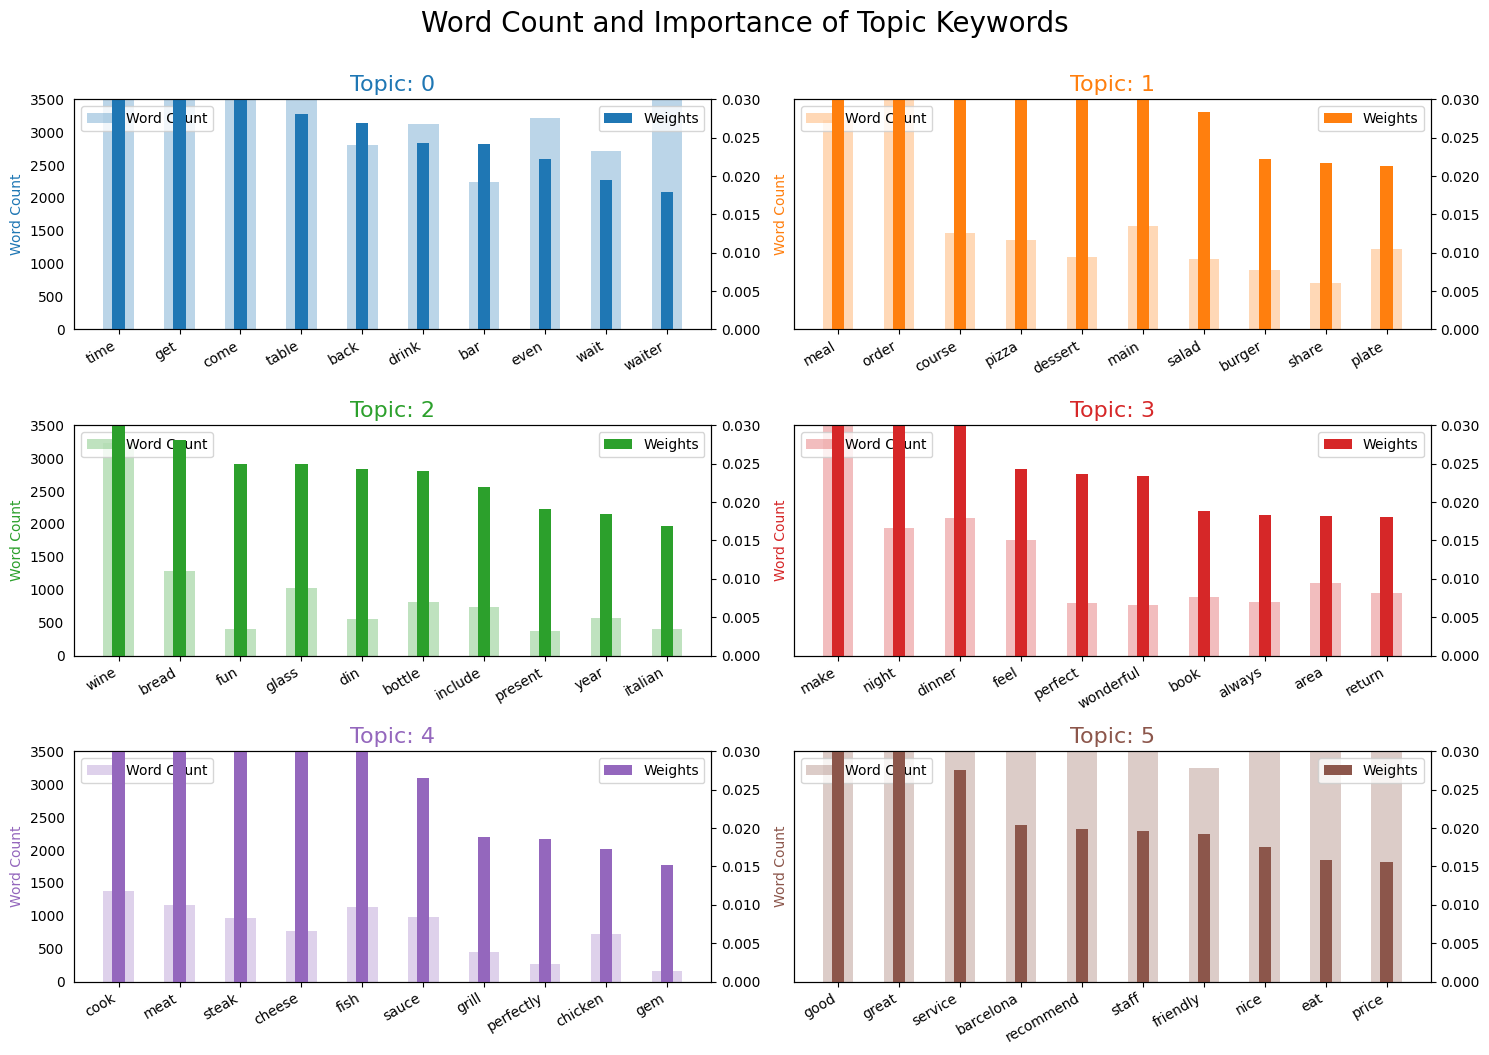

In [64]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(15,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=1)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=20, y=1.05)
plt.show()

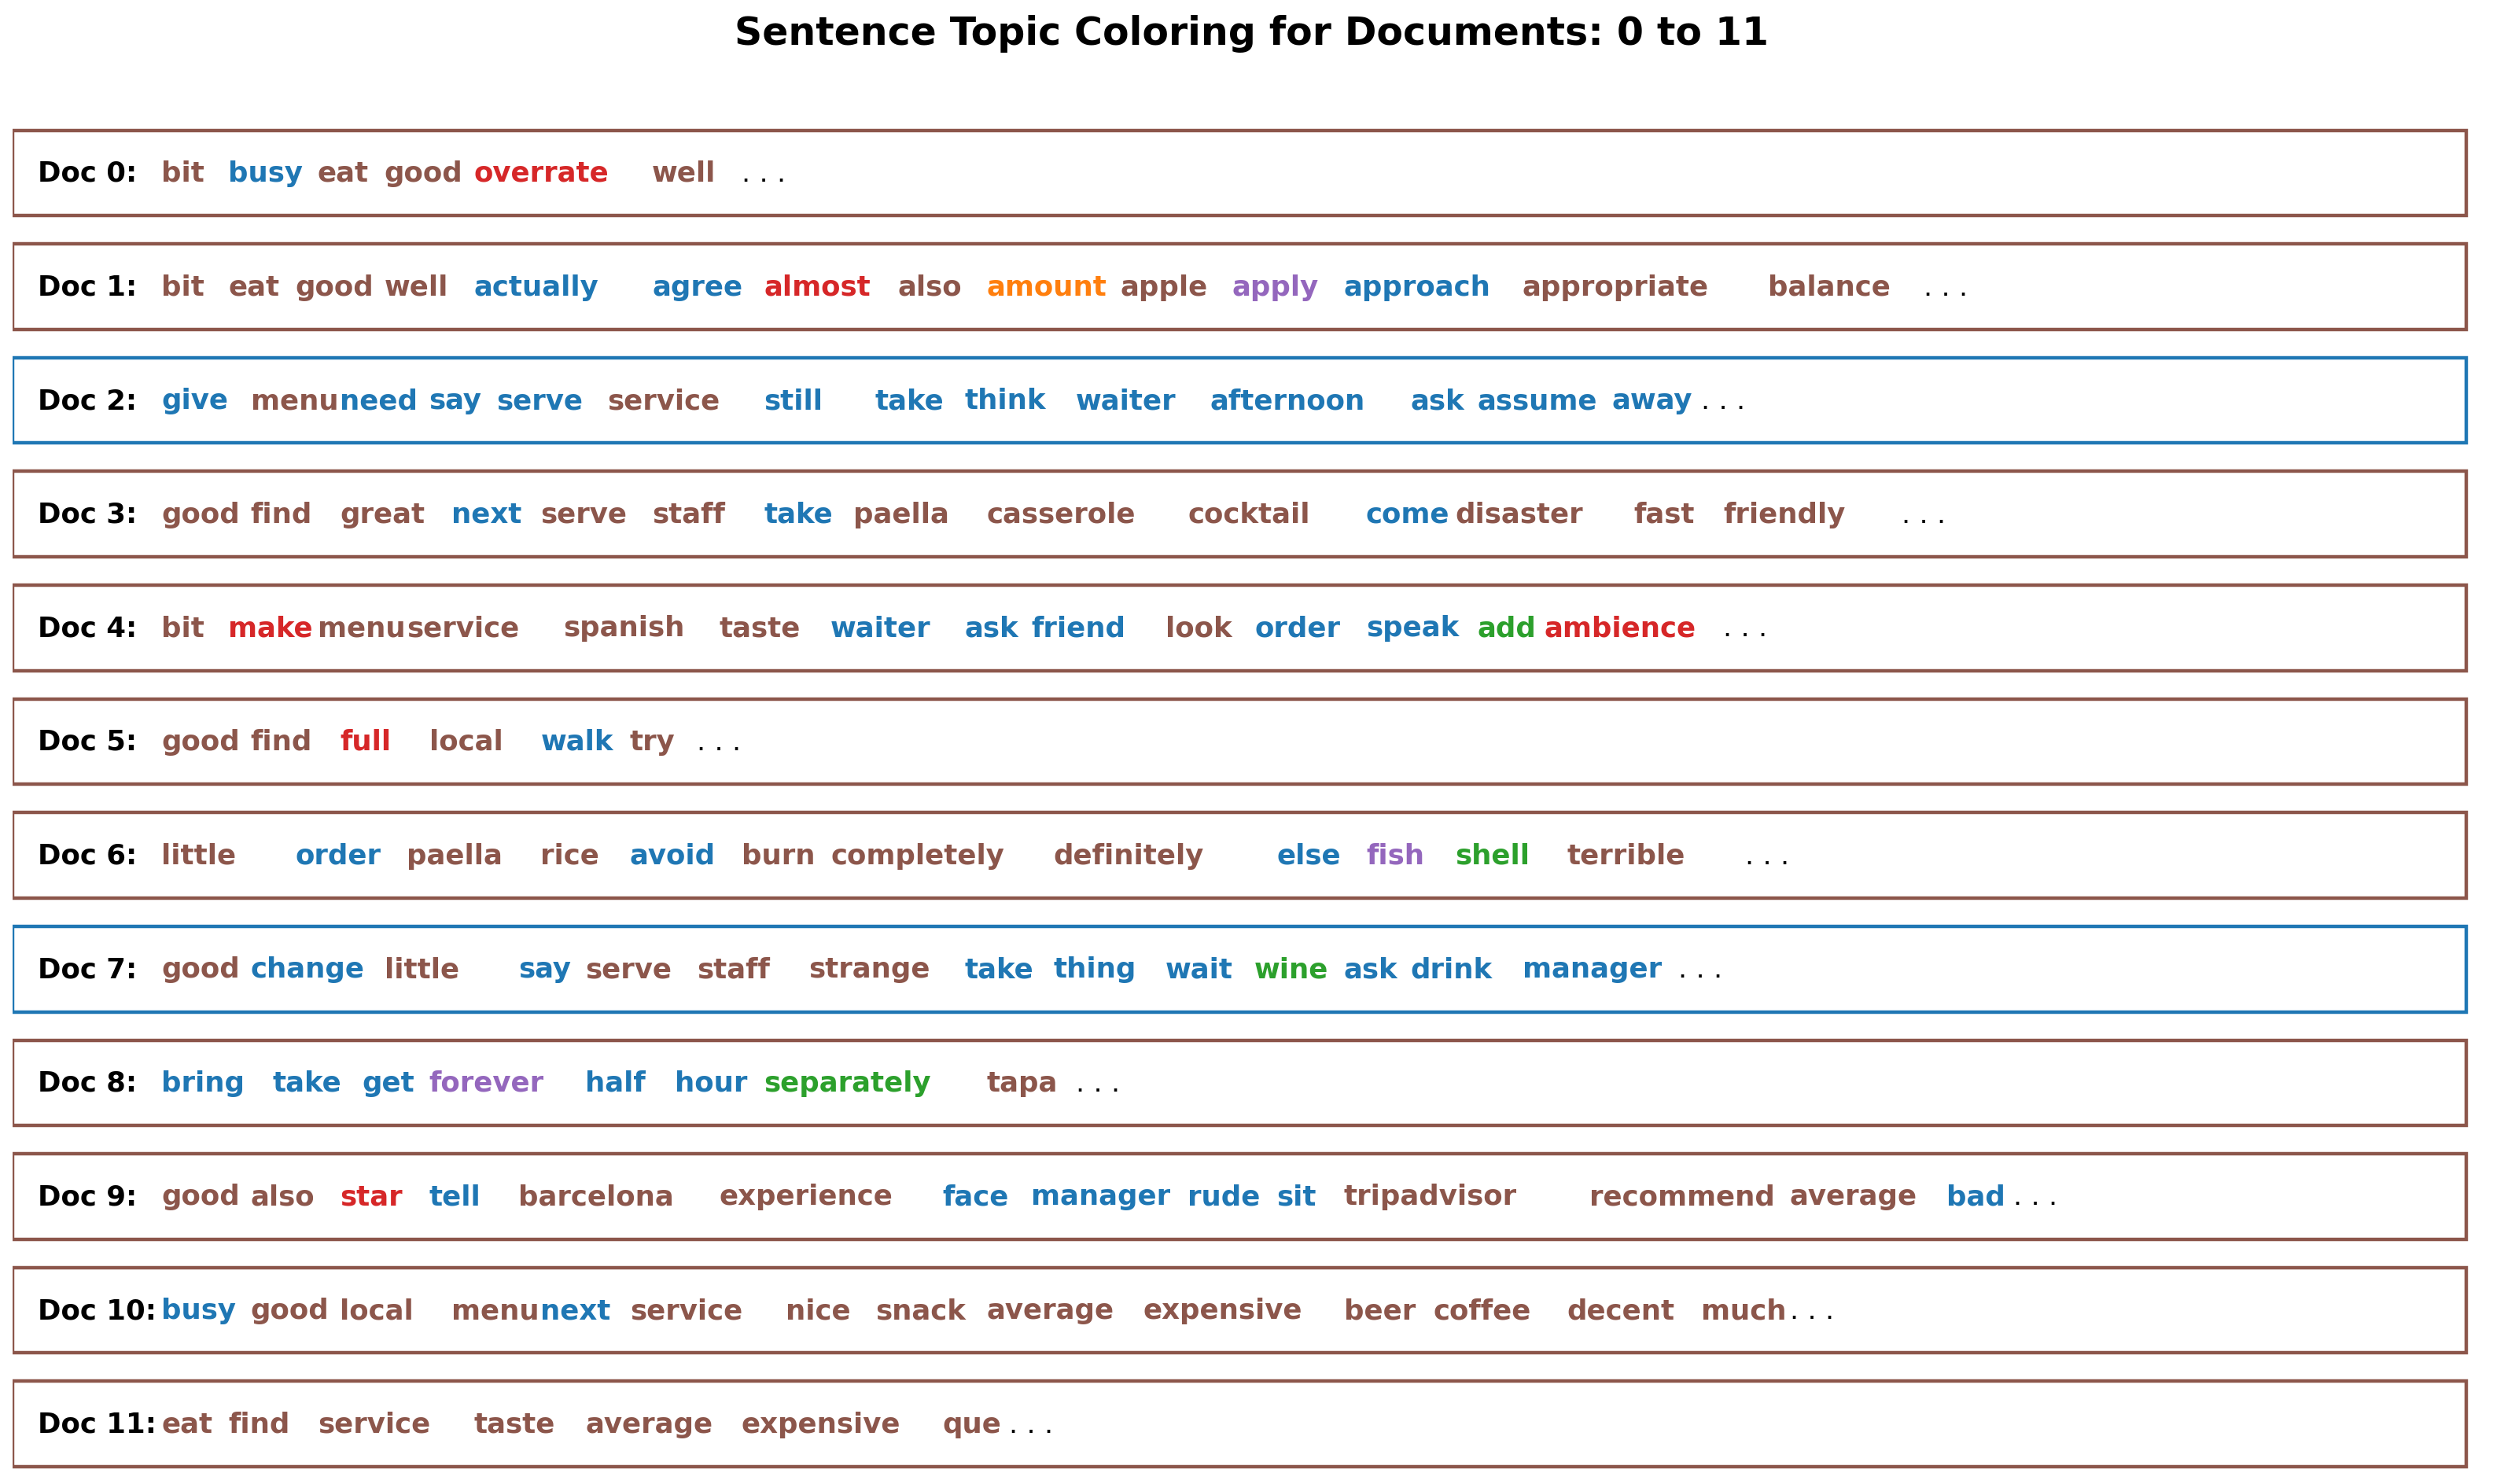

In [65]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [74]:
gc.collect()

67159

What are the most discussed topics in the documents?

In [75]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

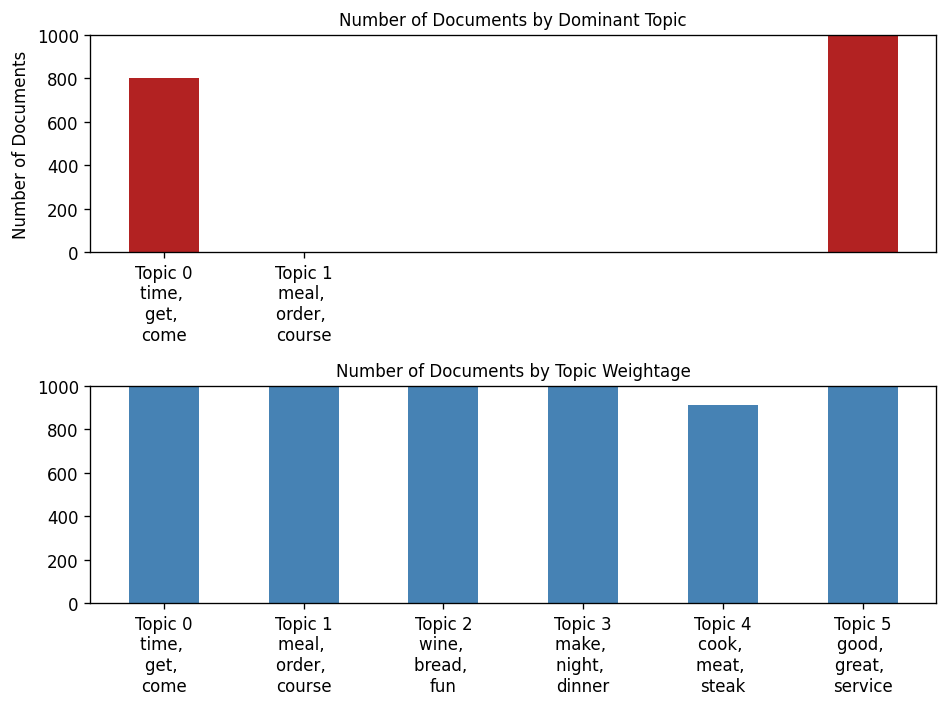

In [78]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))
plt.tight_layout()
plt.show()

In [89]:
# choosing optimal model
optimal_num_topics = 6

# choosing number of keyword per model
optimal_keywords = 10

# training LDA model with optimal number of topics
optimal_lda_model = lda_model

In [90]:
# creating dictionary that stores topics and top words
optimal_lda_topics = optimal_lda_model.show_topics(
    num_topics=optimal_num_topics,
    num_words=optimal_keywords,
    formatted=False
)

In [92]:
# displayin topics and top words
for topic_id, topic in optimal_lda_topics:
    words = ', '.join([word[0] for word in topic])
    print(f'Topic {topic_id}: {words}\n')

Topic 0: time, get, come, table, back, drink, bar, even, wait, waiter

Topic 1: meal, order, course, pizza, dessert, main, salad, burger, share, plate

Topic 2: wine, bread, fun, glass, din, bottle, include, present, year, italian

Topic 3: make, night, dinner, feel, perfect, wonderful, book, always, area, return

Topic 4: cook, meat, steak, cheese, fish, sauce, grill, perfectly, chicken, gem

Topic 5: good, great, service, barcelona, recommend, staff, friendly, nice, eat, price



Observation:

From the graphs and the analysis above, we see that the **'Topic 5'** is the most Dominant Topic in the whole document which is related to **'Good Quality of Service'**.

The 2nd place for dominant Topic is the 'Topic 0' which is related to **'Waiting Service'**.

Testing model on unseen document:

https://stackoverflow.com/questions/67129938/calculating-optimal-number-of-topics-for-topic-modeling-lda